In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv('/content/(Copy) diabetes.csv')

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.shape

(768, 9)

In [7]:
x=dataset.drop('Outcome',axis=1)

In [8]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
y=dataset['Outcome']

In [10]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
55,1,73,50,10,0,23.0,0.248,21
423,2,115,64,22,0,30.8,0.421,21
52,5,88,66,21,23,24.4,0.342,30
717,10,94,72,18,0,23.1,0.595,56
38,2,90,68,42,0,38.2,0.503,27
...,...,...,...,...,...,...,...,...
163,2,100,64,23,0,29.7,0.368,21
371,0,118,64,23,89,0.0,1.731,21
186,8,181,68,36,495,30.1,0.615,60
108,3,83,58,31,18,34.3,0.336,25


In [14]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
269,2,146,0,0,0,27.5,0.240,28
463,5,88,78,30,0,27.6,0.258,37
426,0,94,0,0,0,0.0,0.256,25
5,5,116,74,0,0,25.6,0.201,30
372,0,84,64,22,66,35.8,0.545,21
...,...,...,...,...,...,...,...,...
143,10,108,66,0,0,32.4,0.272,42
323,13,152,90,33,29,26.8,0.731,43
682,0,95,64,39,105,44.6,0.366,22
265,5,96,74,18,67,33.6,0.997,43


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model=DecisionTreeClassifier()

In [17]:
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [18]:
y_predict=model.predict(x_test)

In [19]:
y_test

,Outcome
269,1
463,0
426,0
5,0
372,0
...,...
143,1
323,1
682,0
265,0


In [20]:
from sklearn import metrics


In [21]:
print(metrics.accuracy_score(y_test,y_predict))



0.7012987012987013


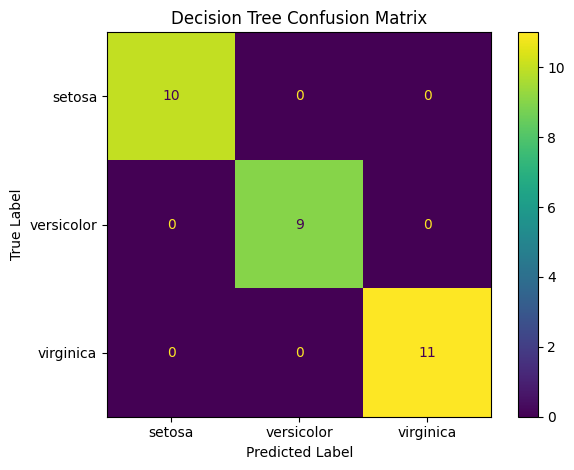

In [23]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset (Iris dataset as an example)
data = load_iris()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='viridis')  # Use any colormap of your choice
disp.ax_.set_title("Decision Tree Confusion Matrix")
disp.ax_.set_xlabel("Predicted Label")
disp.ax_.set_ylabel("True Label")
disp.figure_.tight_layout()


In [ ]:
dataset

In [ ]:
print(model.predict([[3,130,50,35,60,38.5,0.67,38]]))

In [ ]:
if ((model.predict([[3,130,50,35,60,38.5,0.67,38]])[0])==1):
   print("having diabetes")
else:
  print("not having diabetes")

In [ ]:
if model.predict([[1,85,66,29,0,26.6,0.351,31]])[0]==1:
   print(" having diabetes")
else:
  print(" not having diabetes")